In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DeepLearningPractice/ANN/Churn_Modelling.csv")
print(dataset.head())

   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]


In [14]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [15]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [16]:
X = pd.concat([X, geography, gender], axis = 1)
X = X.drop(['Geography', 'Gender'], axis = 1)
print(X.head())

   CreditScore  Age  Tenure    Balance  ...  EstimatedSalary  Germany  Spain  Male
0          619   42       2       0.00  ...        101348.88        0      0     0
1          608   41       1   83807.86  ...        112542.58        0      1     0
2          502   42       8  159660.80  ...        113931.57        0      0     0
3          699   39       1       0.00  ...         93826.63        0      0     0
4          850   43       2  125510.82  ...         79084.10        0      1     0

[5 rows x 11 columns]


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
print(x_train)
print(x_test)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]
[[-0.55204276 -0.36890377  1.04473698 ...  1.75486502 -0.57369368
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ... -0.5698444   1.74309049
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ... -0.5698444   1.74309049
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ...  1.75486502 -0.57369368
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ...  1.75486502 -0.57369368
   0.91601335]]


In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [27]:
classifier = Sequential()

In [51]:
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim = 11))
classifier.add(Dropout(0.3))

In [52]:
classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dropout(0.4))

In [53]:
classifier.add(Dense(units=15, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dropout(0.2))

In [54]:
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [55]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 15)                3

In [56]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.5060 - accuracy: 0.7477 - val_loss: 0.3992 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3789 - accuracy: 0.8015 - val_loss: 0.3932 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4144 - accuracy: 0.7721 - val_loss: 0.3930 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3921 - accuracy: 0.7941 - val_loss: 0.3934 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3804 - accuracy: 0.7934 - val_loss: 0.3873 - val_accuracy: 0.8519
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8308 - val_loss: 0.3949 - val_accuracy: 0.8538
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3710 - accuracy: 0.8400 - val_loss: 0.3898 - val_accuracy: 0.8546

In [58]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [60]:
cm

array([[1515,   80],
       [ 197,  208]])

In [61]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [62]:
print(score)

0.8615


In [63]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


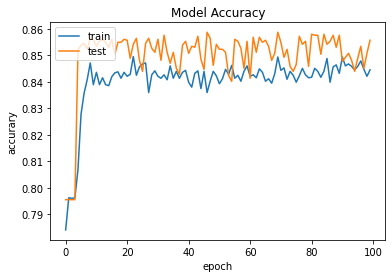

In [73]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accurary')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

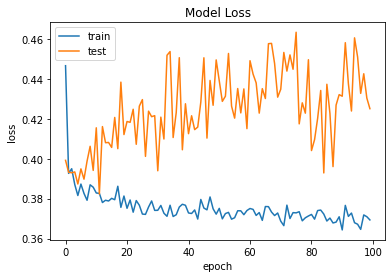

In [74]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')